# Introduction

AAPL and JPM are chosen.

Their daily closing price are downloaded from Yahoo fianance for a period of two years (22/7/2016 - 22/7/2018)

First, a procedure based on linear regression is done and interpreted

A profortlio is then made trying to mimic AAPL movement but reducing the risk.

Finally the iliquid asset is considered, where we try to make a portfolio with as low risk as possible

# Assumptions

We neglect any dividends. We neglect effect of external issues (e.g. trade war, risk rate change). We neglect days where the US exchange is closed, so there are only 504 days in two years. Unless otherwise specified, we shall assumed that std, correlations are static. The ratio of the profortlio is also static.

# AAPL

A simple linear regrssion of AAPL. Mean absolute error and root mean squared error are considered as error range for the linear fit.

MAE=5.43079126308 USD, RMSE= 6.72803477931 USD
Point within MAE: 274 (54.3650793651%)
Point within RMSE: 332 (65.873015873%)


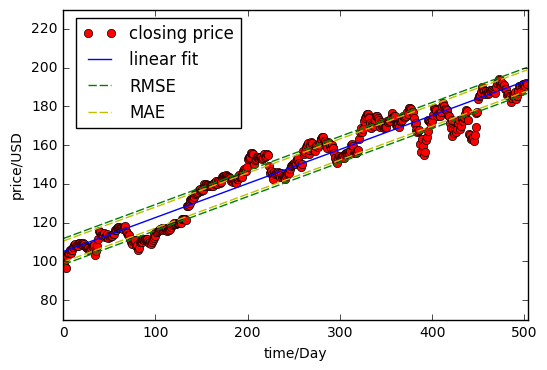

In [408]:
#!/usr/bin/python

import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
raw_data=[]
filename = 'AAPL_daily_twoyr.csv'

with open(filename,'r') as inputfile:
   for line in inputfile:
        line_mod = line.split(',')
        # the no. index decides which price to plot with
        raw_data.append(line_mod[4])
inputfile.close()
lstdata = list(raw_data)
# pop the 'Close' in the raw data
lstdata.pop(0)
fltdata = [float(x) for x in lstdata]
tframe = np.array([i for i in range(0,len(fltdata))]).reshape(-1,1)
#fltdata is the numerical datas in list in float, ready to use, tframe is time

#least square fitting part
regr = linear_model.LinearRegression()
regr.fit(tframe,fltdata)
linfit = regr.predict(tframe)
MSE = mean_squared_error(fltdata,linfit)
MAE = mean_absolute_error(fltdata,linfit)
RMSE = math.sqrt(MSE)
WMAE = 0
WRMSE = 0
for i in range(len(tframe)):
   if abs(fltdata[i]-linfit[i]) < MAE:
        WMAE +=1
   if abs(fltdata[i]-linfit[i]) < RMSE:
        WRMSE +=1
print ('MAE='+str(MAE)+" USD"+', '+'RMSE= '+str(RMSE)+" USD")
print ('Point within MAE: ' + str(WMAE)+' ('+str(float(WMAE)/len(tframe)*100)+'%)')
print ("Point within RMSE: " + str(WRMSE)+' ('+str(float(WRMSE)/len(tframe)*100)+'%)')

#plotting everything
raw, = plt.plot(tframe,fltdata,'ro')
reg, = plt.plot(tframe,linfit,'b-')
err1, = plt.plot(tframe,linfit + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe,linfit - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe,linfit + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe,linfit - MAE, 'y-', dashes= [6,2])
plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.4,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),70,230])
plt.title('')
plt.show()        

There is indeed a underlying linear trend. A reasonable strategy may be if any points is out of the error range, we expect it will move back towards the fitting line. For instance, if the stock price falls below the green line we should buy the stock.

With this strategy over the above, assuming we buy 1 unit and sell unit at the signals, we shall gain/loss (rounding to integer):

MAE: (137-99) + (168-150) + (194-160) = 90 while we are now holding a unit at 181 now

RMSE: (140-97)+(168-150)+(194-160) = 95 while we are holding a unit at 181 now

We want to evaluate the predictive power of our model. We take the about 9/10 of the data as training set while the remaining 1/10 closer to the current date as test set

Point within MAE: 32 (59.2592592593%)
Point within RMSE: 36 (66.6666666667%)


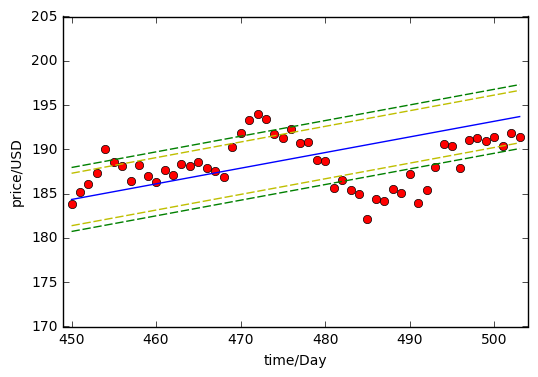

In [404]:
#!/usr/bin/python
ts = (len(tframe)/10)*9
tframe_pred=tframe[ts:]
fltdata_test=fltdata[ts:]
regr = linear_model.LinearRegression()
regr.fit(tframe[:ts],fltdata[:ts])
linfit = regr.predict(tframe_pred)

MSE = mean_squared_error(fltdata_test,linfit)
MAE = mean_absolute_error(fltdata_test,linfit)
RMSE = math.sqrt(MSE)
WMAE = 0
WRMSE = 0
for i in range(len(tframe_pred)):
   if abs(fltdata_test[i]-linfit[i]) < MAE:
        WMAE +=1
   if abs(fltdata_test[i]-linfit[i]) < RMSE:
        WRMSE +=1
print ('Point within MAE: ' + str(WMAE)+' ('+str(float(WMAE)/len(tframe_pred)*100)+'%)')
print ("Point within RMSE: " + str(WRMSE)+' ('+str(float(WRMSE)/len(tframe_pred)*100)+'%)')

#plotting everything
raw, = plt.plot(tframe_pred,fltdata_test,'ro')
reg, = plt.plot(tframe_pred,linfit,'b-')
err1, = plt.plot(tframe_pred,linfit + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,linfit - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_pred,linfit + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe_pred,linfit - MAE, 'y-', dashes= [6,2])
# plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([ts-1,len(fltdata),170,205])
plt.title('')
plt.show()

So for this stock the predictive power is reasonable.

And thats how we predict the trend of AAPL next week:

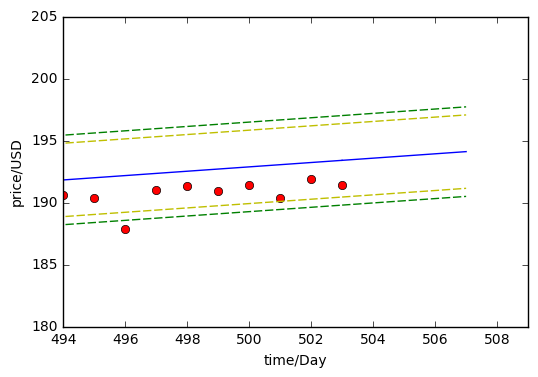

In [398]:
#!/usr/bin/python
ts = len(tframe)
tframe_pred= np.array([i for i in range(len(tframe)-1,len(tframe)+4)]).reshape(-1,1)
fltdata_test=fltdata
regr = linear_model.LinearRegression()
regr.fit(tframe,fltdata)
linfit = regr.predict(tframe)
linfit_pred = regr.predict(tframe_pred)

#plotting everything
raw, = plt.plot(tframe,fltdata_test,'ro')
reg, = plt.plot(tframe_pred,linfit_pred,'b-')
reg2, = plt.plot(tframe,linfit,'b-')
err1, = plt.plot(tframe_pred,linfit_pred + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,linfit_pred - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_pred,linfit_pred + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe_pred,linfit_pred - MAE, 'y-', dashes= [6,2])
err5, = plt.plot(tframe,linfit + RMSE, 'g-', dashes= [6,2])
err6, = plt.plot(tframe,linfit - RMSE, 'g-', dashes= [6,2])
err7, = plt.plot(tframe,linfit + MAE, 'y-', dashes= [6,2])
err8, = plt.plot(tframe,linfit - MAE, 'y-', dashes= [6,2])
#plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframe)-10,len(fltdata)+5,180,205])
plt.title('')
plt.show()

Note that the stock is currently within the error range. However, it shall not remain as it will touch the MAE. So we might guess that it will move up.

Point within RMSE: 52 (96.2962962963%)


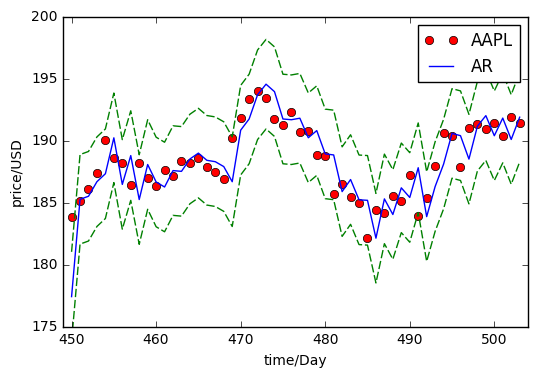

In [405]:
from statsmodels.tsa.arima_model import ARIMA

history =fltdata[:ts]
pred = []

for i in range(len(tframe_pred)):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    tmp = output[0][0]
    pred.append(tmp)
    history.append(fltdata_test[i])

MSEar = mean_squared_error(fltdata_test,pred)
MAEar = mean_absolute_error(fltdata_test,pred)
RMSEar = math.sqrt(MSE)
WMAEar = 0
WRMSEar = 0
for i in range(len(tframe_pred)):
   if abs(fltdata_test[i]-pred[i]) < MAEar:
        WMAEar +=1
   if abs(fltdata_test[i]-pred[i]) < RMSEar:
        WRMSEar +=1

print ("Point within RMSE: " + str(WRMSEar)+' ('+str(float(WRMSEar)/len(tframe_pred)*100)+'%)')

prede = np.array(pred)

raw, = plt.plot(tframe_pred,fltdata_test,'ro')
#raw2, = plt.plot(tframe_pred,fltdata_test,'r-')
#AR, = plt.plot(tframe_pred,pred,'bo')
AR2, = plt.plot(tframe_pred,pred,'b-')
err1, = plt.plot(tframe_pred,prede + RMSEar, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,prede - RMSEar, 'g-', dashes= [6,2])
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.legend([raw,AR2],['AAPL','AR'])
plt.axis([ts-1,len(fltdata),175,200])
plt.title('')
plt.show()

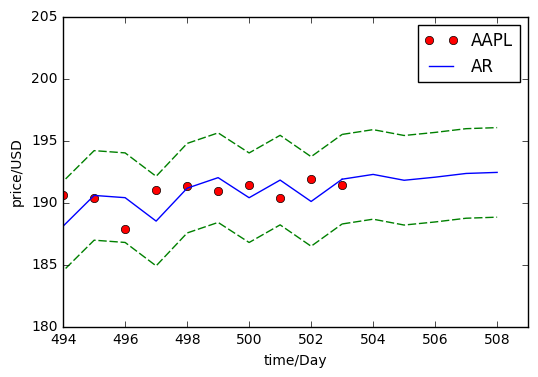

In [423]:
from statsmodels.tsa.arima_model import ARIMA

tframe_predt= np.array([i for i in range(len(tframe)-1,len(tframe)+5)]).reshape(-1,1)
historyp = fltdata[1:]
predtion = [pred[len(pred)-1]]

for i in range(len(tframe_predt)-1):
    model = ARIMA(historyp, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    tmp = output[0][0]
    predtion.append(tmp)
    historyp.append(tmp)

predte = np.array(predtion)

raw, = plt.plot(tframe_pred,fltdata_test,'ro')
#raw2, = plt.plot(tframe_pred,fltdata_test,'r-')
#AR, = plt.plot(tframe_pred,pred,'bo')
AR2, = plt.plot(tframe_pred,pred,'b-')
AR2, = plt.plot(tframe_predt,predtion,'b-')
err1, = plt.plot(tframe_pred,prede + RMSEar, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,prede - RMSEar, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_predt,predte + RMSEar, 'g-', dashes= [6,2])
err4, = plt.plot(tframe_predt,predte - RMSEar, 'g-', dashes= [6,2])
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.legend([raw,AR2],['AAPL','AR'])
plt.axis([len(tframe)-10,len(fltdata)+5,180,205])
plt.title('')
plt.show()

# JPM

Linear fit:

MAE=4.31380609399 USD, RMSE= 5.16139659577 USD
Point within MAE: 278 (55.1587301587%)
Point within RMSE: 312 (61.9047619048%)


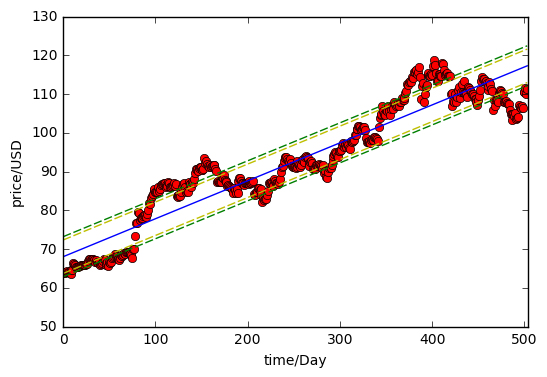

In [424]:
raw_data=[]
filename2 = 'JPM.csv'

with open(filename2,'r') as inputfile:
   for line in inputfile:
        line_mod = line.split(',')
        # the no. index decides which price to plot with
        raw_data.append(line_mod[4])
inputfile.close()
lstdata2 = list(raw_data)
# pop the 'Close' in the raw data
lstdata2.pop(0)
fltdata2 = [float(x) for x in lstdata2]
#fltdata is the numerical datas in list in float, ready to use, tframe is time

#least square fitting part
regr = linear_model.LinearRegression()
regr.fit(tframe,fltdata2)
linfit2 = regr.predict(tframe)
MSE = mean_squared_error(fltdata2,linfit2)
MAE = mean_absolute_error(fltdata2,linfit2)
RMSE = math.sqrt(MSE)
WMAE = 0
WRMSE = 0
for i in range(len(tframe)):
   if abs(fltdata2[i]-linfit2[i]) < MAE:
        WMAE +=1
   if abs(fltdata2[i]-linfit2[i]) < RMSE:
        WRMSE +=1
print ('MAE='+str(MAE)+" USD"+', '+'RMSE= '+str(RMSE)+" USD")
print ('Point within MAE: ' + str(WMAE)+' ('+str(float(WMAE)/len(tframe)*100)+'%)')
print ("Point within RMSE: " + str(WRMSE)+' ('+str(float(WRMSE)/len(tframe)*100)+'%)')

#plotting everything
raw, = plt.plot(tframe,fltdata2,'ro')
reg, = plt.plot(tframe,linfit2,'b-')
err1, = plt.plot(tframe,linfit2 + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe,linfit2 - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe,linfit2 + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe,linfit2 - MAE, 'y-', dashes= [6,2])
#plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),50,130])
plt.title('')
plt.show() 

With the same assumptions as in AAPL, the Gain/Loss:

MAE: (81-64) + (106-84) = 39 while we are now holding a unit at 107 now

RMSE: (83-66) + (110-82) = 45 while we are now holding a unit at 105 now

In one week:

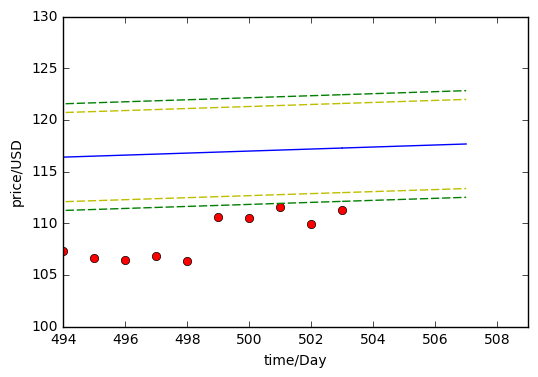

In [425]:
ts = len(tframe)
tframe_pred= np.array([i for i in range(len(tframe)-1,len(tframe)+4)]).reshape(-1,1)
fltdata_test=fltdata2
regr = linear_model.LinearRegression()
regr.fit(tframe,fltdata2)
linfit2 = regr.predict(tframe)
linfit_pred = regr.predict(tframe_pred)
MSE = mean_squared_error(fltdata_test,linfit2)
MAE = mean_absolute_error(fltdata_test,linfit2)
RMSE = math.sqrt(MSE)
WMAE = 0
WRMSE = 0
for i in range(len(tframe_pred)):
   if abs(fltdata_test[i]-linfit[i]) < MAE:
        WMAE +=1
   if abs(fltdata_test[i]-linfit[i]) < RMSE:
        WRMSE +=1

#plotting everything
raw, = plt.plot(tframe,fltdata_test,'ro')
reg, = plt.plot(tframe_pred,linfit_pred,'b-')
reg2, = plt.plot(tframe,linfit2,'b-')
err1, = plt.plot(tframe_pred,linfit_pred + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,linfit_pred - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_pred,linfit_pred + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe_pred,linfit_pred - MAE, 'y-', dashes= [6,2])
err5, = plt.plot(tframe,linfit2 + RMSE, 'g-', dashes= [6,2])
err6, = plt.plot(tframe,linfit2 - RMSE, 'g-', dashes= [6,2])
err7, = plt.plot(tframe,linfit2 + MAE, 'y-', dashes= [6,2])
err8, = plt.plot(tframe,linfit2 - MAE, 'y-', dashes= [6,2])
#plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframe)-10,len(fltdata)+5,100,130])
plt.title('')
plt.show()

I would say that is tempting even for this very simple model.

Point within RMSE: 52 (96.2962962963%)


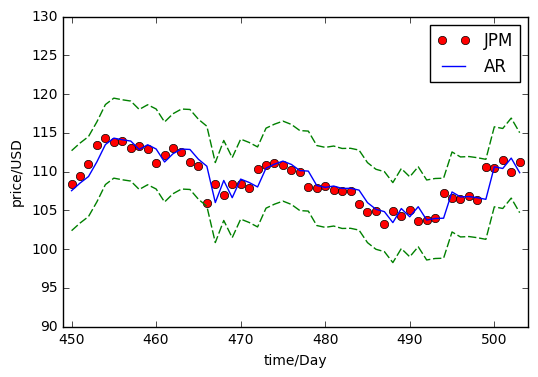

In [429]:
ts = (len(tframe)/10)*9
history2 =fltdata2[:ts]
pred2 = []
tframe_pred=tframe[ts:]
fltdata2_test=fltdata2[ts:]

for i in range(len(tframe_pred)):
    model = ARIMA(history2, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    tmp = output[0][0]
    pred2.append(tmp)
    history2.append(fltdata2_test[i])

MSEar2 = mean_squared_error(fltdata2_test,pred2)
MAEar2 = mean_absolute_error(fltdata2_test,pred2)
RMSEar2 = math.sqrt(MSE)
WMAEar2 = 0
WRMSEar2 = 0
for i in range(len(tframe_pred)):
   if abs(fltdata2_test[i]-pred2[i]) < MAEar:
        WMAEar2 +=1
   if abs(fltdata2_test[i]-pred2[i]) < RMSEar:
        WRMSEar2 +=1

print ("Point within RMSE: " + str(WRMSEar2)+' ('+str(float(WRMSEar2)/len(tframe_pred)*100)+'%)')

# prede2 = np.array(pred2)

raw, = plt.plot(tframe_pred,fltdata2_test,'ro')
#raw2, = plt.plot(tframe_pred,fltdata_test,'r-')
#AR, = plt.plot(tframe_pred,pred,'bo')
AR2, = plt.plot(tframe_pred,pred2,'b-')
err1, = plt.plot(tframe_pred,prede2 + RMSEar2, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,prede2 - RMSEar2, 'g-', dashes= [6,2])
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.legend([raw,AR2],['JPM','AR'])
plt.axis([ts-1,len(fltdata),90,130])
plt.title('')
plt.show()

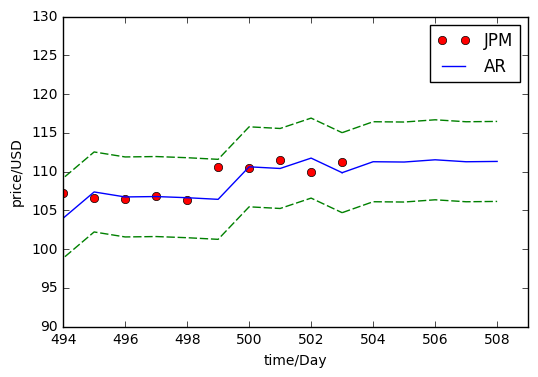

In [432]:
tframe_predt= np.array([i for i in range(len(tframe)-1,len(tframe)+5)]).reshape(-1,1)
historyp2 = fltdata2[1:]
predtion2 = [pred2[len(pred2)-1]]

for i in range(len(tframe_predt)-1):
    model = ARIMA(historyp2, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    tmp = output[0][0]
    predtion2.append(tmp)
    historyp2.append(tmp)

predte2 = np.array(predtion2)

raw, = plt.plot(tframe_pred,fltdata2_test,'ro')
#raw2, = plt.plot(tframe_pred,fltdata_test,'r-')
#AR, = plt.plot(tframe_pred,pred,'bo')
AR2, = plt.plot(tframe_pred,pred2,'b-')
AR2, = plt.plot(tframe_predt,predtion2,'b-')
err1, = plt.plot(tframe_pred,prede2 + RMSEar2, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,prede2 - RMSEar2, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_predt,predte2 + RMSEar2, 'g-', dashes= [6,2])
err4, = plt.plot(tframe_predt,predte2 - RMSEar2, 'g-', dashes= [6,2])
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.legend([raw,AR2],['JPM','AR'])
plt.axis([len(tframe)-10,len(fltdata)+5,90,130])
plt.title('')
plt.show()

# Correlation between AAPL and JPM; Portfolio setup

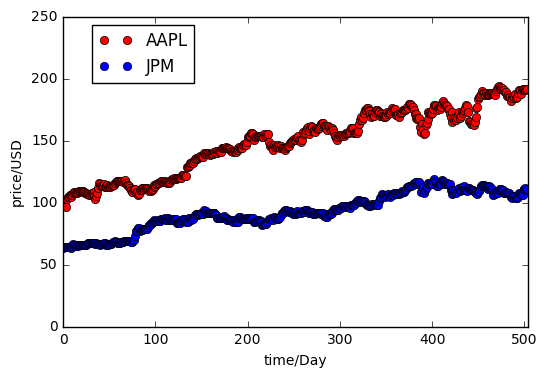

In [257]:
raw, = plt.plot(tframe,fltdata,'ro')
raw2, = plt.plot(tframe,fltdata2,'bo')
plt.legend([raw,raw2],['AAPL', 'JPM'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),0,250])
plt.title('')
plt.show()

As we can see from above, both of them has a (reasonably) positive linear trend. APPL rise faster, but JPM has slightly smaller risk (smaller MAE and RMSE).

A reasonable profortlio could be mirroring AAPL trend but reducing the risk.

We take a look at their price change over the testing time period. For AAPL

Standard deviation of price change of AAPL= 1.89158936954


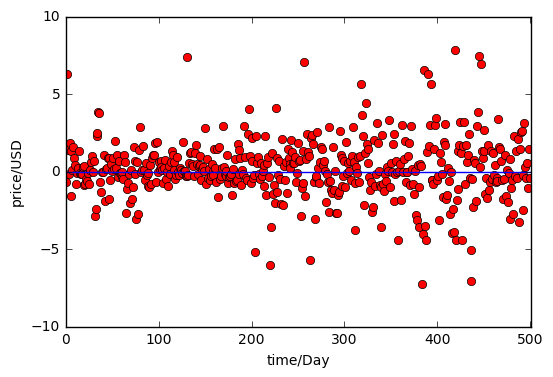

In [338]:
tmp1 = fltdata[:len(fltdata)-1]
fltdata.pop(0)
delta1 = [float(x) for x in np.array(fltdata) - np.array(tmp1)]
delta1.remove(delta1[0])
tframe = np.array([i for i in range(0,len(fltdata)-1)]).reshape(-1,1)
std1=np.std(delta1)
print("Standard deviation of price change of AAPL= " + str(std1))

raw1, = plt.plot(tframe,delta1,'ro')
plt.axhline(linewidth=1)
#plt.legend([raw1],['AAPL price change'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(tframe),-10,10])
plt.title('')
plt.show()

There are some extreme points at the upper half of the graph. Also it tends to be more volatile for as time increases. Otherwise it is reasonably stationary

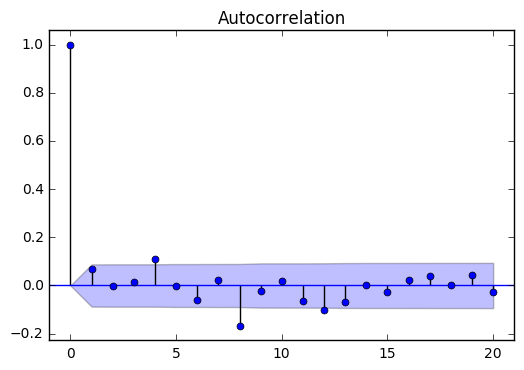

In [348]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(delta1, lags=20)
plt.show()

For JPM:

Standard deviation of price change of JPM= 1.13076640709


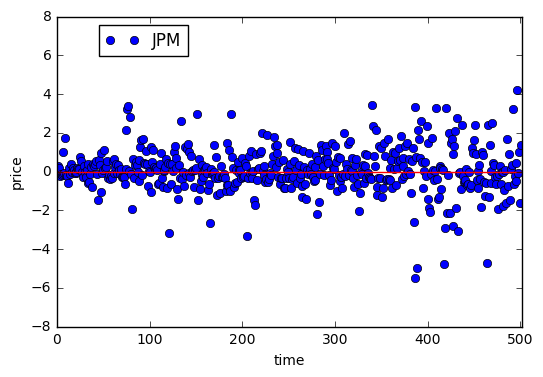

In [259]:
tmp2 = fltdata2[:len(fltdata2)-1]
fltdata2.pop(0)
delta2 = [float(x) for x in np.array(fltdata2) - np.array(tmp2)]
delta2.remove(delta2[0])

std2=np.std(delta2)
print("Standard deviation of price change of JPM= " + str(std2))

raw2, = plt.plot(tframe,delta2,'bo')
plt.axhline(linewidth=1, color="red")
plt.legend([raw2],['JPM'],bbox_to_anchor=(0.3,1))
plt.ylabel('price')
plt.xlabel('time')
plt.axis([0,len(tframe),-8,8])
plt.title('')
plt.show()

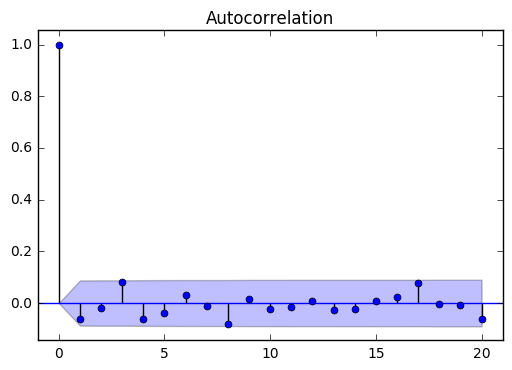

In [345]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(delta2, lags=20)
plt.show()

The std of JPM price change is only about 60% that of AAPL, further confirming that for the two years JPM is less volatile than AAPL.

We are now ready to think about our profortlio. We normalize the number of units brought from each of the stocks i.e. if we buy 0.2 units of JPM, then we buy 1-0.2=0.8 units of APPL. Keep in mind that we aim at mirroring AAPL trend but reducing the risk.

Correlation of price change of AAPL and JPM: 0.316481368479
Ratio of JPM/AAPL in portfolio is 50 %.
Std of the price change of the portfolio: 1.64513673384
Correlation of price change of AAPL and portfolio: 0.994078084454


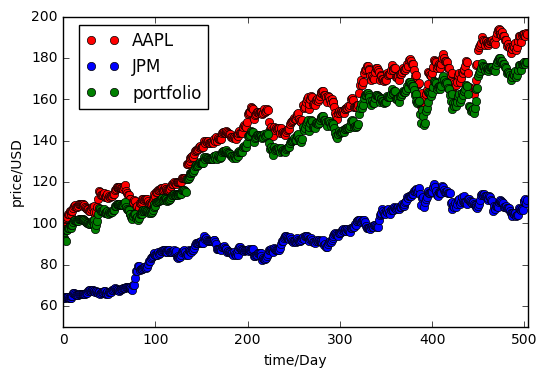

In [275]:
raw_data=[]
raw_data2=[]
filename = 'AAPL_daily_twoyr.csv'
filename2 = 'JPM.csv'

with open(filename,'r') as inputfile:
   for line in inputfile:
        line_mod = line.split(',')
        # the no. index decides which price to plot with
        raw_data.append(line_mod[4])
inputfile.close()
lstdata = list(raw_data)
# pop the 'Close' in the raw data
lstdata.pop(0)
fltdata = [float(x) for x in lstdata]
array1 = np.array(fltdata)
tframe = np.array([i for i in range(0,len(fltdata))]).reshape(-1,1)

with open(filename2,'r') as inputfile:
   for line in inputfile:
        line_mod = line.split(',')
        # the no. index decides which price to plot with
        raw_data2.append(line_mod[4])
inputfile.close()
lstdata = list(raw_data2)
# pop the 'Close' in the raw data
lstdata.pop(0)
fltdata2 = [float(x) for x in lstdata]
array2 = np.array(fltdata2)

corr=np.corrcoef(delta1,delta2)
h = 0.2
N1 = 1/(1+h)
N2 = 1 - N1
port = N1*array1 + N2*array2
stdp = np.std(port)
deltap = N1*np.array(delta1) + N2*np.array(delta2)
stddp = np.std(deltap)
corrp=np.corrcoef(delta1,deltap)
print ('Correlation of price change of AAPL and JPM: ' + str(corr[0][1]))
print ('Ratio of JPM/AAPL in portfolio is 50 %.' )
print ('Std of the price change of the portfolio: ' + str(stddp))
print ('Correlation of price change of AAPL and portfolio: ' + str(corrp[0][1]))

raw, = plt.plot(tframe,fltdata,'ro')
raw2, = plt.plot(tframe,fltdata2,'bo')
raw3, = plt.plot(tframe,port, 'go')
plt.legend([raw,raw2,raw3],['AAPL', 'JPM', 'portfolio'],bbox_to_anchor=(0.33,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),50,200])
plt.title('')
plt.show()

Note that AAPL and JPM have a positive correlation, which is expected by there increasing trend with time.

Ratio of JPM/AAPL in portfolio is 50 %.
Std of the price change of the portfolio: 1.42545907224
Correlation of price change of AAPL and portfolio: 0.96803115943


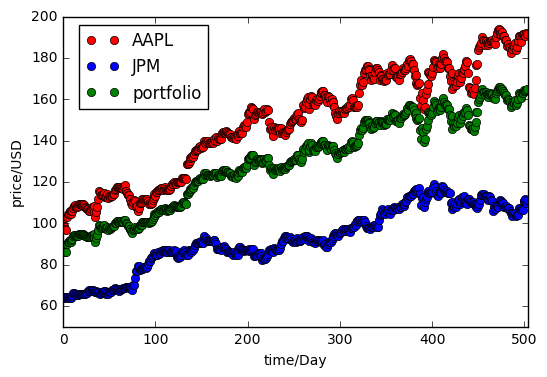

In [276]:
corr=np.corrcoef(delta1,delta2)
h = 0.5
N1 = 1/(1+h)
N2 = 1 - N1
port = N1*array1 + N2*array2
stdp = np.std(port)
deltap = N1*np.array(delta1) + N2*np.array(delta2)
stddp = np.std(deltap)
corrp=np.corrcoef(delta1,deltap)
print ('Ratio of JPM/AAPL in portfolio is 50 %.' )
print ('Std of the price change of the portfolio: ' + str(stddp))
print ('Correlation of price change of AAPL and portfolio: ' + str(corrp[0][1]))

raw, = plt.plot(tframe,fltdata,'ro')
raw2, = plt.plot(tframe,fltdata2,'bo')
raw3, = plt.plot(tframe,port, 'go')
plt.legend([raw,raw2,raw3],['AAPL', 'JPM', 'portfolio'],bbox_to_anchor=(0.33,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),50,200])
plt.title('')
plt.show()

Ratio of JPM/AAPL in portfolio is 50 %.
Std of the price change of the portfolio: 1.24597488604
Correlation of price change of AAPL and portfolio: 0.902720180396


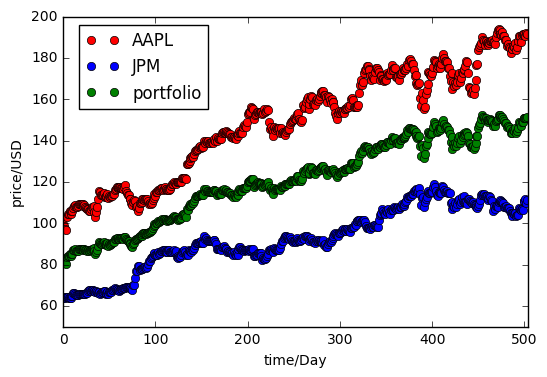

In [277]:
corr=np.corrcoef(delta1,delta2)
h = 0.999
N1 = 1/(1+h)
N2 = 1 - N1
port = N1*array1 + N2*array2
stdp = np.std(port)
deltap = N1*np.array(delta1) + N2*np.array(delta2)
stddp = np.std(deltap)
corrp=np.corrcoef(delta1,deltap)
print ('Ratio of JPM/AAPL in portfolio is 50 %.' )
print ('Std of the price change of the portfolio: ' + str(stddp))
print ('Correlation of price change of AAPL and portfolio: ' + str(corrp[0][1]))

raw, = plt.plot(tframe,fltdata,'ro')
raw2, = plt.plot(tframe,fltdata2,'bo')
raw3, = plt.plot(tframe,port, 'go')
plt.legend([raw,raw2,raw3],['AAPL', 'JPM', 'portfolio'],bbox_to_anchor=(0.33,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),50,200])
plt.title('')
plt.show()

We plot three different profortlio with JPM/APPL equals 20%, 50% and 100% respectively. As expected, the more we include JPM, the lower the std. A 1:1 proportion of JPM and AAPL gives a std of price change of 1.25 (compare to 1.89 for AAPL alone). Still, correlation with AAPL > 0.9. Therefore this profortliois reasonable for our purpose (intuition is not too bad afterall...)

We repeat the analysis of the stocks on the profortlio.

MAE=3.40584775452 USD, RMSE= 4.12548310435 USD
Point within MAE: 281 (55.753968254%)
Point within RMSE: 347 (68.8492063492%)


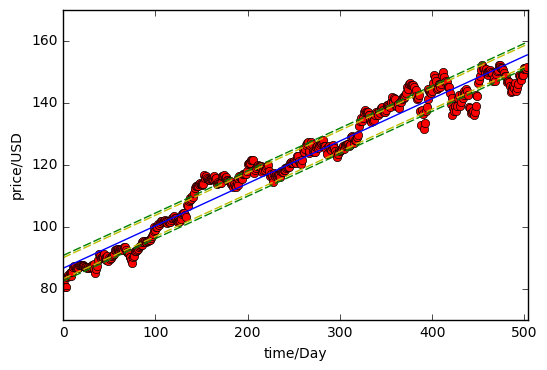

In [278]:
#least square fitting part
regr = linear_model.LinearRegression()
regr.fit(tframe,port)
linfitp = regr.predict(tframe)
MSE = mean_squared_error(port,linfitp)
MAE = mean_absolute_error(port,linfitp)
RMSE = math.sqrt(MSE)
WMAE = 0
WRMSE = 0
for i in range(len(tframe)):
   if abs(port[i]-linfitp[i]) < MAE:
        WMAE +=1
   if abs(port[i]-linfitp[i]) < RMSE:
        WRMSE +=1
print ('MAE='+str(MAE)+" USD"+', '+'RMSE= '+str(RMSE)+" USD")
print ('Point within MAE: ' + str(WMAE)+' ('+str(float(WMAE)/len(tframe)*100)+'%)')
print ("Point within RMSE: " + str(WRMSE)+' ('+str(float(WRMSE)/len(tframe)*100)+'%)')

#plotting everything
raw, = plt.plot(tframe,port,'ro')
reg, = plt.plot(tframe,linfitp,'b-')
err1, = plt.plot(tframe,linfitp + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe,linfitp - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe,linfitp + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe,linfitp - MAE, 'y-', dashes= [6,2])
#plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([0,len(fltdata),70,170])
plt.title('')
plt.show() 

Compare to MAE=5.43079126308 USD, RMSE= 6.72803477931 USD for AAPL, the error is much smaller.

And prediction for one week later:

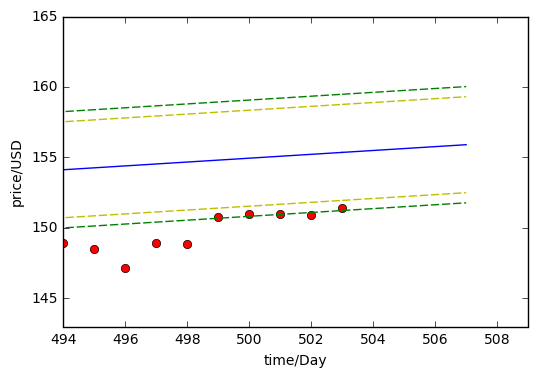

In [279]:
#!/usr/bin/python
tframe_pred= np.array([i for i in range(len(tframe)-1,len(tframe)+4)]).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(tframe,port)
linfitp = regr.predict(tframe)
linfitp_pred = regr.predict(tframe_pred)

#plotting everything
raw, = plt.plot(tframe,port,'ro')
reg, = plt.plot(tframe_pred,linfitp_pred,'b-')
reg2, = plt.plot(tframe,linfitp,'b-')
err1, = plt.plot(tframe_pred,linfitp_pred + RMSE, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,linfitp_pred - RMSE, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_pred,linfitp_pred + MAE, 'y-', dashes= [6,2])
err4, = plt.plot(tframe_pred,linfitp_pred - MAE, 'y-', dashes= [6,2])
err5, = plt.plot(tframe,linfitp + RMSE, 'g-', dashes= [6,2])
err6, = plt.plot(tframe,linfitp - RMSE, 'g-', dashes= [6,2])
err7, = plt.plot(tframe,linfitp + MAE, 'y-', dashes= [6,2])
err8, = plt.plot(tframe,linfitp - MAE, 'y-', dashes= [6,2])
#plt.legend([raw,reg,err1,err3],['closing price', 'linear fit', 'RMSE', 'MAE'],bbox_to_anchor=(0.3,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframe)-10,len(tframe)+5,143,165])
plt.title('')
plt.show()

Just like JPM, we should buy the profortlio now. We expect it to move back into the error range.

Point within RMSE: 42 (77.7777777778%)


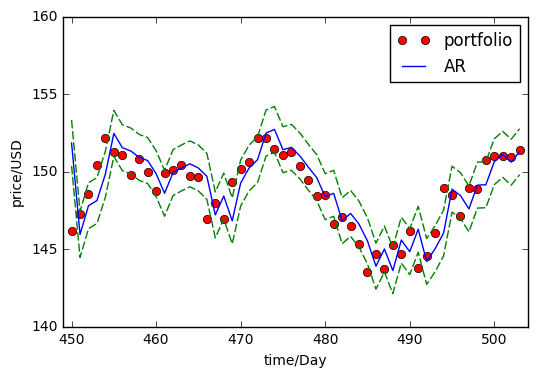

In [440]:
ts = (len(tframe)/10)*9
tframe_pred=tframe[ts:]
lport = list(port)
port_train=lport[ts:]
historypt = lport[1:]
predpt = []

for i in range(len(tframe_pred)):
    model = ARIMA(historypt, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    tmp = output[0][0]
    predpt.append(tmp)
    historypt.append(port_train[i])

MSEarpt = mean_squared_error(port_train,predpt)
MAEarpt = mean_absolute_error(port_train,predpt)
RMSEarpt = math.sqrt(MSEarpt)
WMAEarpt = 0
WRMSEarpt = 0
for i in range(len(tframe_pred)):
   if abs(port_train[i]-predpt[i]) < MAEarpt:
        WMAEarpt +=1
   if abs(port_train[i]-predpt[i]) < RMSEarpt:
        WRMSEarpt +=1

print ("Point within RMSE: " + str(WRMSEarpt)+' ('+str(float(WRMSEarpt)/len(tframe_pred)*100)+'%)')

predept = np.array(predpt)

raw, = plt.plot(tframe_pred,port_train,'ro')
#raw2, = plt.plot(tframe_pred,fltdata_test,'r-')
#AR, = plt.plot(tframe_pred,pred,'bo')
AR2, = plt.plot(tframe_pred,predpt,'b-')
err1, = plt.plot(tframe_pred,predept + RMSEarpt, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,predept - RMSEarpt, 'g-', dashes= [6,2])
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.legend([raw,AR2],['portfolio','AR'])
plt.axis([ts-1,len(tframe),140,160])
plt.title('')
plt.show()

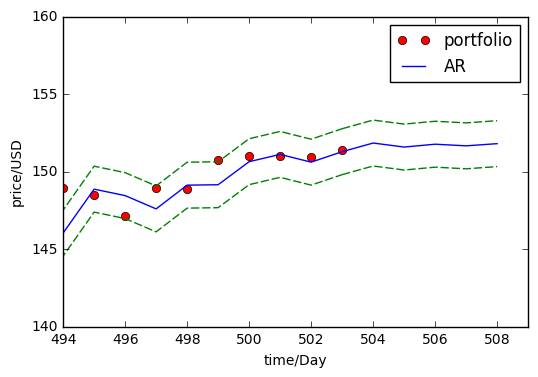

In [442]:
tframe_predt= np.array([i for i in range(len(tframe)-1,len(tframe)+5)]).reshape(-1,1)
historyptt = lport[1:]
predtionpt = [predpt[len(predpt)-1]]

for i in range(len(tframe_predt)-1):
    model = ARIMA(historyptt, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    tmp = output[0][0]
    predtionpt.append(tmp)
    historyptt.append(tmp)

predtept = np.array(predtionpt)

raw, = plt.plot(tframe_pred,port_train,'ro')
#raw2, = plt.plot(tframe_pred,fltdata_test,'r-')
#AR, = plt.plot(tframe_pred,pred,'bo')
AR3, = plt.plot(tframe_pred,predpt,'b-')
AR2, = plt.plot(tframe_predt,predtionpt,'b-')
err1, = plt.plot(tframe_pred,predept + RMSEarpt, 'g-', dashes= [6,2])
err2, = plt.plot(tframe_pred,predept - RMSEarpt, 'g-', dashes= [6,2])
err3, = plt.plot(tframe_predt,predtept + RMSEarpt, 'g-', dashes= [6,2])
err4, = plt.plot(tframe_predt,predtept - RMSEarpt, 'g-', dashes= [6,2])
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.legend([raw,AR2],['portfolio','AR'])
plt.axis([len(tframe)-10,len(tframe)+5,140,160])
plt.title('')
plt.show()

# Incoporating the iliquid asset

Here I will pick AAPL as the stock to compare with.

For simplicity I shall name this iliquid asset as "IL".

Thus "IL" now cost 13 * 99.43 = 1292.59 USD. It has a correlation factor with AAPL by -0.7. 

However, we have no information for the correlation between JPM and IL.

To try to estimate the behviour of IL, we need some assumption. Here is the most important one in this part:

Suppose that the correlation of IL with AAPL is the same for a short period of time (for instance, for this month). Under this assumption, we can (very very) roughly assume that the relationship between the price change of IL and AAPL to be -0.7 * 13.

We assume the MAE of IL to be 0.7 x 13 x MAE of AAPL, as absolute error is linear. Thus we shall estimates the risk with MAE.

We can backward induce the price of IL over a short period of time:

MAE= 49.420200494 USD
std of price change = 17.2071895237 USD


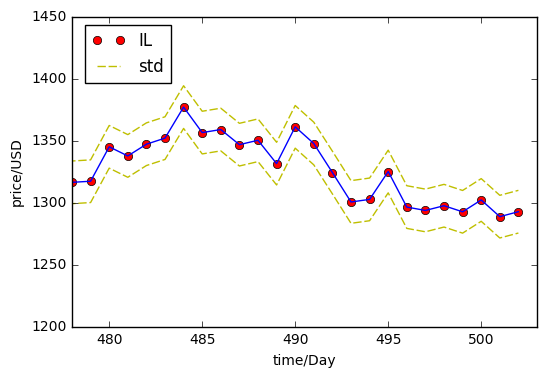

In [280]:
inverseDI1 = list(delta1[::-1])
deltaIL = -0.7*13*np.array(inverseDI1)
iIL=[1292.59]
for i in range(len(deltaIL)):
    iIL += [iIL[i]+(-1)*(-0.7)*13*inverseDI1[i]]
IL = list(iIL[::-1])

MAEaa = mean_absolute_error(fltdata,linfit)
MAEil = MAEaa * 13 * 0.7
print ('MAE= '+str(MAEil)+" USD")

stdIL =13*0.7*std1
print ('std of price change = '+str(stdIL)+" USD")

tframeil = np.array([i for i in range(0,len(IL))]).reshape(-1,1)
raw2, = plt.plot(tframeil,IL,'ro')
raw, = plt.plot(tframeil,IL,'b-')
err7, = plt.plot(tframeil,IL + stdIL, 'y-', dashes= [6,2])
err8, = plt.plot(tframeil,IL - stdIL, 'y-', dashes= [6,2])
plt.legend([raw2,err7],['IL', 'std'],bbox_to_anchor=(0.23,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframeil)-25,len(tframeil),1200,1450])
plt.title('')
plt.show()

To add IL into our portfolio, keep in mind that we want to reduce risk of our profortlio but maintain the upward trend of AAPL.

A negative correlation means that adding this asset into the profortlio can  further hedge the portfolio. It can be proven that there is an optimal ratio between IL and AAPL so that a portfolio consisting only the two of them has minimal variance.

Again as a rough estimate, a hedge ration of IL/AAPL ~ 1/13x0.7x0.5 = 0.0269 will 'cancel' the variance of AAPL in the portfolio.

So we can try to add 0.01 IL into the porfolio:

Estimated std price change: 1.66624264615


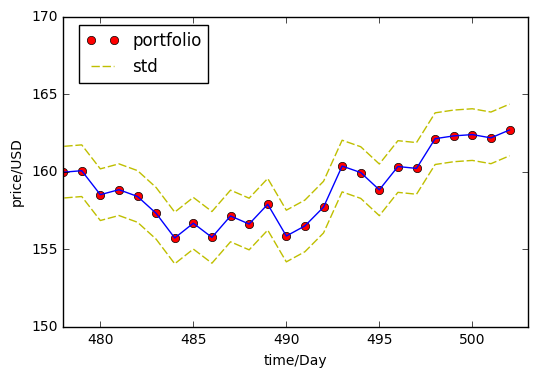

In [322]:
x = 0.01
N3 = 1/(1+x)
N4 = 1 - N3
portIL = N3*port[1:] + N4*np.array(IL)
#MAEp = mean_absolute_error(port,linfitp)
#MAEil = N3*MAEp + N4*MAEaa*13
stdp = N4*stdIL + N3*(0.5*std1+0.5*std2)

print ("Estimated std price change: " + str(stdp))
tframeil = np.array([i for i in range(0,len(portIL))]).reshape(-1,1)
raw2, = plt.plot(tframeil,portIL,'ro')
raw, = plt.plot(tframeil,portIL,'b-')
err7, = plt.plot(tframeil,portIL + stdp, 'y-', dashes= [6,2])
err8, = plt.plot(tframeil,portIL - stdp, 'y-', dashes= [6,2])
plt.legend([raw2,err7],['portfolio', 'std'],bbox_to_anchor=(0.33,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframeil)-25,len(tframeil),150,170])
plt.title('')
plt.show()

Compare to AAPL at the same time period:

std price change: 1.89089994766


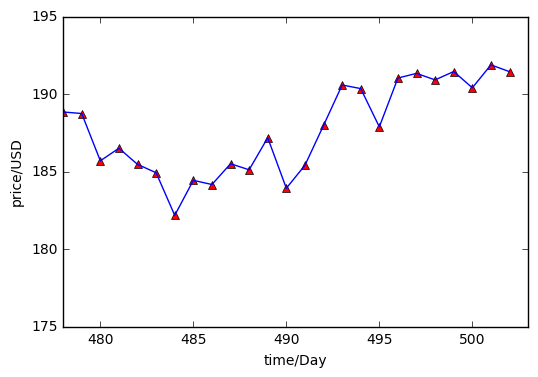

In [305]:
print ("std price change: " + str(std1))
aapl, =plt.plot(tframeil,fltdata[1:],'r^')
aapl2, =plt.plot(tframeil,fltdata[1:],'b-')
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframeil)-25,len(tframeil),175,195])
plt.title('')
plt.show()

The std is lowered compare to AAPL, but is actually higher than the original portfolio.

It is not too reasonable to do regression on the above plot due to insufficient data, and our fragile assumptions on the price of IL.

Since our portfolio consist mainly of AAPL and JPM which has a rising trend , a one week prediction of similar to the original porfolio should be made.

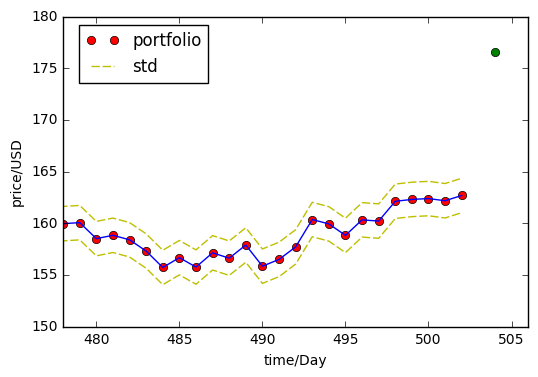

In [334]:
tframeil = np.array([i for i in range(0,len(portIL))]).reshape(-1,1)
nwpp = N3*(0.5*191.44*0.97+0.5*111.28) + N4*1.2*13*191.44
nwp = plt.plot(504 ,nwpp, 'go' )
raw2, = plt.plot(tframeil,portIL,'ro')
raw, = plt.plot(tframeil,portIL,'b-')
err7, = plt.plot(tframeil,portIL + stdp, 'y-', dashes= [6,2])
err8, = plt.plot(tframeil,portIL - stdp, 'y-', dashes= [6,2])
plt.legend([raw2,err7],['portfolio', 'std'],bbox_to_anchor=(0.33,1))
plt.ylabel('price/USD')
plt.xlabel('time/Day')
plt.axis([len(tframeil)-25,len(tframeil)+3,150,180])
plt.title('')
plt.show()

so it out scored the yellow tunnel by a large margin. Under our assumptions this mean that our new porfolio price is too high, and we should sell something.

i) If we are allowed to trade IL, then clearly we should redue the amount of IL we are holding. Given the -0.7 % correlation of IL with AAPL, a 20% rise is too high to be normal (typically the price change of AAPL is below 3%). Hence we should sell as much IL as possible

ii) When we can't trade IL, keep in mind that our porfolio is right now under valued. A further drop of AAPL by 3% makes it out of RSME range. Hence we should increase our amount of AAPL in our portfolio.